<h2 style="text-align: center;">Training CNN using MNIST Digits Dataset</h2>

#### Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist

In [2]:
__import__("tensorflow").config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### Data Exploration

In [3]:
# Loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1)  # Reshape to match CNN input shape
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32') / 255.0  # Normalize pixel values between 0 and 1
X_test = X_test.astype('float32') / 255.0

In [5]:
X_train[0].shape # first image array

(28, 28, 1)

In [6]:
# Convert the labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
y_train[0] # first label

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
np.argmax(y_train)

5

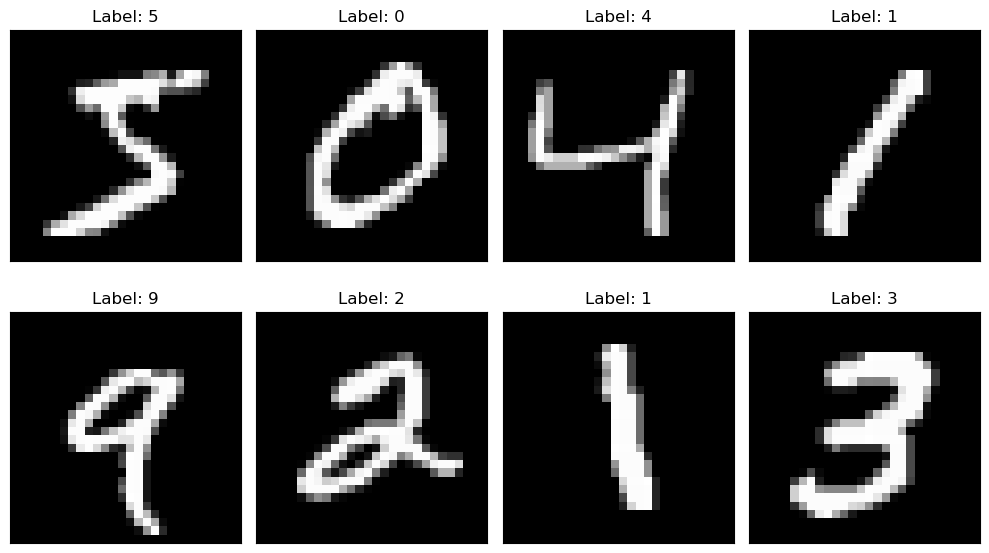

In [9]:
# Plotting first 8 samples
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Label: {np.argmax(y_train[i])}")
plt.tight_layout()
plt.show()

#### Data Augmentation

In [10]:
# Create an image data generator with augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1
)

# Generate augmented images for training set
augmented_train_images = []
augmented_train_labels = []
for i in range(40000):
    for X_batch, y_batch in train_datagen.flow(X_train, y_train, batch_size=1):
        augmented_train_images.append(X_batch[0])
        augmented_train_labels.append(y_batch[0])
        break

augmented_train_images = np.array(augmented_train_images)
augmented_train_labels = np.array(augmented_train_labels)

# Concatenate original and augmented data
X_train_augmented = np.concatenate((X_train, augmented_train_images), axis=0)
y_train_augmented = np.concatenate((y_train, augmented_train_labels), axis=0)

In [11]:
# Create an image data generator with augmentation
test_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1
)

# Generate augmented images for testing set
augmented_test_images = []
augmented_test_labels = []
for i in range(10000):
    for X_batch, y_batch in test_datagen.flow(X_test, y_test, batch_size=1):
        augmented_test_images.append(X_batch[0])
        augmented_test_labels.append(y_batch[0])
        break

augmented_test_images = np.array(augmented_test_images)
augmented_test_labels = np.array(augmented_test_labels)

# Concatenate original and augmented data
X_test_augmented = np.concatenate((X_test, augmented_test_images), axis=0)
y_test_augmented = np.concatenate((y_test, augmented_test_labels), axis=0)

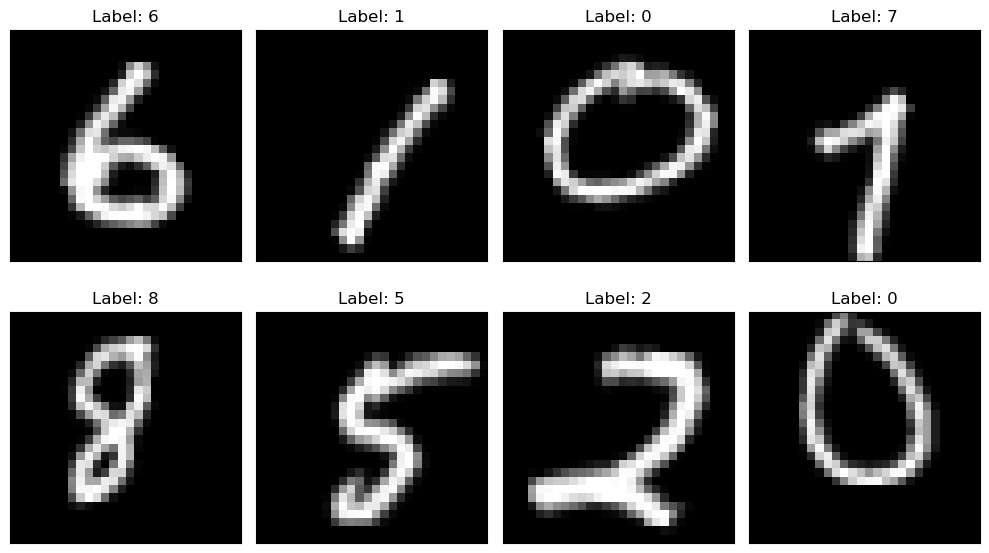

In [12]:
# Plotting augmented images
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(augmented_train_images[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Label: {np.argmax(augmented_train_labels[i])}")
plt.tight_layout()
plt.show()

In [13]:
print("Size of training set: ", len(X_train_augmented))
print("Size of test set: ", len(X_test_augmented))

Size of training set:  100000
Size of test set:  20000


#### Training CNN

In [14]:
# Create the CNN model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), padding="same"),
    Dropout(0.25),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), padding="same"),
    Dropout(0.25),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), padding="same"),
    Dropout(0.25),

    Flatten(),

    Dense(units=256, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=10, activation='softmax')
])

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(
    X_train_augmented, 
    y_train_augmented, 
    validation_data=(X_test_augmented, y_test_augmented), 
    batch_size=32, 
    epochs=20
)

Epoch 1/20
3125/3125 [==============================] - 39s 11ms/step - loss: 0.2070 - accuracy: 0.9342 - val_loss: 0.0576 - val_accuracy: 0.9820
Epoch 2/20
3125/3125 [==============================] - 35s 11ms/step - loss: 0.0817 - accuracy: 0.9746 - val_loss: 0.0417 - val_accuracy: 0.9872
Epoch 3/20
3125/3125 [==============================] - 33s 11ms/step - loss: 0.0640 - accuracy: 0.9805 - val_loss: 0.0415 - val_accuracy: 0.9868
Epoch 4/20
3125/3125 [==============================] - 33s 11ms/step - loss: 0.0554 - accuracy: 0.9836 - val_loss: 0.0363 - val_accuracy: 0.9886
Epoch 5/20
3125/3125 [==============================] - 34s 11ms/step - loss: 0.0496 - accuracy: 0.9849 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 6/20
3125/3125 [==============================] - 35s 11ms/step - loss: 0.0435 - accuracy: 0.9873 - val_loss: 0.0307 - val_accuracy: 0.9908
Epoch 7/20
3125/3125 [==============================] - 33s 11ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0270 -

#### Analyzing Results

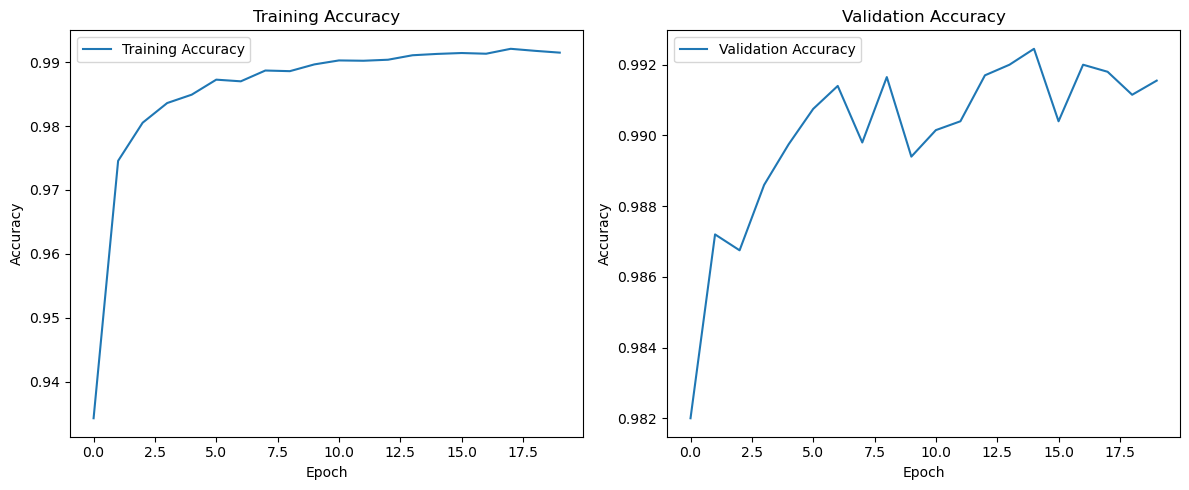

In [17]:
# Get the training and validation accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 5))

# Create a subplot for the training accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Create a subplot for the validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

# Show the plot
plt.show()

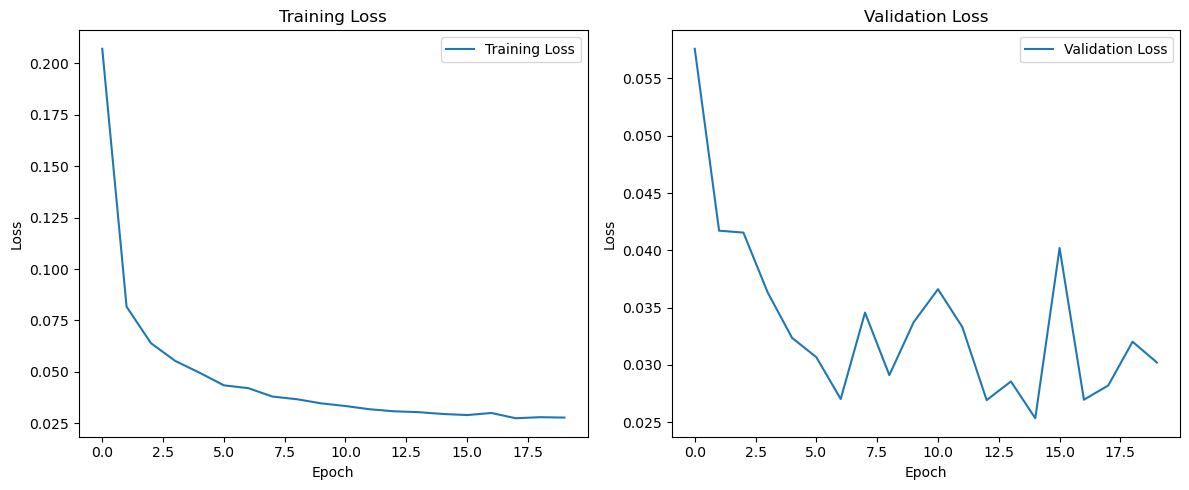

In [18]:
# Get the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))

# Create a subplot for the training loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Create a subplot for the validation loss
plt.subplot(1, 2, 2)
plt.plot(val_loss, label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# Save the model
model.save('digits_classifier_cnn.h5')

#### Testing The Model

In [20]:
def show_test_image_predictions(index):
    # Get the image and its label from the test set
    image = X_test_augmented[index]
    actual_label = np.argmax(y_test_augmented[index])

    # Reshape the image for visualization
    image = image.reshape((28, 28))

    # Make the prediction using the model
    predicted_label = np.argmax(model.predict(np.expand_dims(image, axis=0)))

    # Create the figure
    fig, ax = plt.subplots(figsize=(4, 4))

    # Display the image
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    ax.axis('off')

    # Center the title
    fig.tight_layout()

    # Show the image with actual and predicted labels
    plt.show()

1/1 [==============================] - 1s 535ms/step


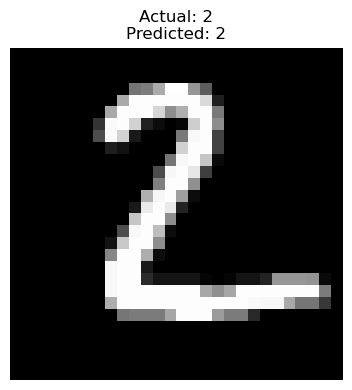

In [21]:
show_test_image_predictions(1)

1/1 [==============================] - 0s 35ms/step


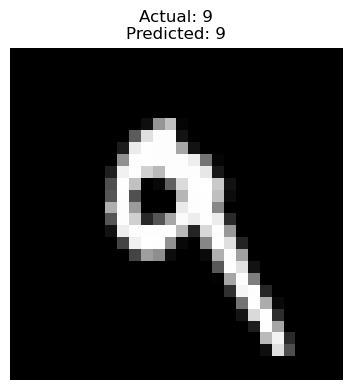

In [22]:
show_test_image_predictions(7)

1/1 [==============================] - 0s 51ms/step


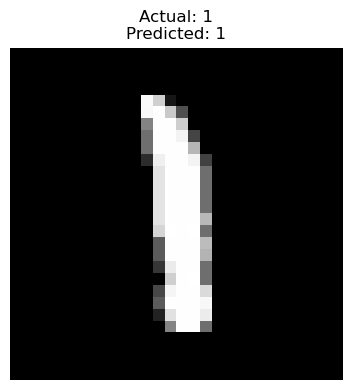

In [23]:
show_test_image_predictions(777)

***
Wanna see the CNN Digit Recognizer in action?  
Check out the [GitHub repository](https://github.com/TheStrange-007/DigitRecognizer) for the code and detailed instructions on how to use this model.
***
